<a href="https://colab.research.google.com/github/DpaolaMontes22/Programacionavanzada_parcial2/blob/main/EjercicioPiton20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UPIIH_PROGRAMACION AVANZADA

PROGRAMA QUE SIMULA EL TIRO PARABOLICO 

Danna Paola Montes de Oca Hernandez 2021680104

Ingresar velocidad inicial: 3
Ingresar angulo inicial: 20
Ingresar altura inicial: 4
Ingresar masa del proyectil: 34
Ingresar area del proyectil: 2
     i            x            y           Δt     g [m/s²]    ρ [kg/m³]
     0       0.0000       4.0000       0.0000       9.8066       0.0000
     1       0.2819       3.9555       0.1000       9.8066       0.0000
     2       0.5638       3.8129       0.2000       9.8066       0.0000
     3       0.8457       3.5723       0.3000       9.8066       0.0000
     4       1.1276       3.2336       0.4000       9.8066       0.0000
     5       1.4095       2.7969       0.5000       9.8066       0.0000
     6       1.6914       2.2620       0.6000       9.8066       0.0000
     7       1.9734       1.6291       0.7000       9.8066       0.0000
     8       2.2553       0.8982       0.8000       9.8066       0.0000
     9       2.5372       0.0692       0.9000       9.8066       0.0000
    10       2.8191      -0.8579       1.0000       9.8066  

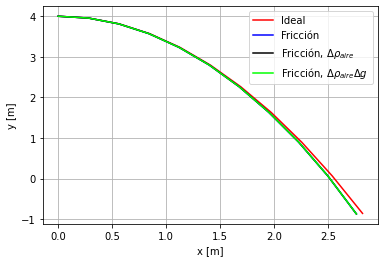

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def limite(cad, a, b):
    val = 0
    while True:
        val = float(input("Ingresar " + cad))
        if (val > a) and (val < b):
            break
    return val

def simula(caso, v0, an0, h0, vx, vy, g, radT, C_air, rho, A, m, dt, text):
    i = 0
    x = [0]
    y = [h0]
    vx = vx
    vy = vy
    ax = 0
    ay = 0
    f = open( text + "_" + str(caso) + ".txt" ,"w")
    
    f.write("---Caso {}---\n". format(caso))
    f.write("Velocidad inicial        : {} m/s\n".format(v0))
    f.write("Ángulo inicial           : {} °\n".format(an0))
    f.write("Altura inicial           : {} m\n".format(h0))
    f.write("Masa proyectil           : {} kg\n".format(m))
    f.write("Área del proyectil       : {} m^2\n".format(A))
    f.write("Coeficiente aerodinámico : {} \n".format(C_air))
        
    print("{0} {1} {2} {3} {4} {5}".format('i'.rjust(6,' '), 'x'.rjust(12, ' '), 'y'.rjust(12, ' '), '\u0394t'.rjust(12, ' '), 'g [m/s\u00B2]'.rjust(12, ' '), '\u03C1 [kg/m\u00B3]'.rjust(12, ' ')))
    f.write( "{0} {1} {2} {3} {4} {5}\n".format('i'.rjust(6,' '), 'x'.rjust(12, ' '), 'y'.rjust(12, ' '), 'dt'.rjust(12, ' '), 'g [m/s^2]'.rjust(12, ' '), 'rho [kg/m^3]'.rjust(12, ' ')) )
    while True:
        if(caso == 1):
            rho = 0
            gc = g
        if(caso == 2):
            rho = rho
            gc = g
        if(caso == 3):
            rho = -0.0001031*y[i] + 1.216
            gc = g
        if(caso == 4):
            rho = -0.0001031*y[i] + 1.216
            gc = g*( ( radT/(radT+y[i]) )**2 )
        
        angle = np.tan( vy/vx )
        ax = -C_air*0.5*rho*A*(vx**2 + vy**2)/m*np.cos(angle)
        ay = -gc - C_air*0.5*rho*A*(vx**2 + vy**2)/m*np.sin(angle)
        
        print("{0:6d} {1:12.4f} {2:12.4f} {3:12.4f} {4:12.4f} {5:12.4f}".format(i, x[i], y[i], i*dt, gc, rho))
        f.write("{0:6d} {1:12.4f} {2:12.4f} {3:12.4f} {4:12.4f} {5:12.4f}\n".format(i, x[i], y[i], i*dt, gc, rho))
        vx = vx + ax * dt
        vy = vy + ay * dt
                
        if( y[i] < 0 ):
            break
        
        x.append( x[i] + vx*dt + (1/2)*ax*(dt**2) )
        y.append( y[i] + vy*dt + (1/2)*ay*(dt**2) )
        i += 1
    
    f.close()
    return x, y

v0 = float(input("Ingresar velocidad inicial: "))
an0 = float(input("Ingresar angulo inicial: "))
h0 = float(input("Ingresar altura inicial: "))
m = float(input("Ingresar masa del proyectil: "))
A = float(input("Ingresar area del proyectil: "))
C_air = 0.25
g= 9.80665
rho = 1.2254
dt = 0.1
radT = 6371000
texto = "proyectil"

th0 = an0 * np.pi / 180
vx = v0 * np.cos(th0)
vy = v0 * np.sin(th0)

x, y = simula(1, v0, an0, h0, vx, vy, g, radT, C_air, rho, A, m, dt, texto)
x1, y1 = simula(2, v0, an0, h0, vx, vy, g, radT, C_air, rho, A, m, dt, texto)
x2, y2 = simula(3, v0, an0, h0, vx, vy, g, radT, C_air, rho, A, m, dt, texto)
x3, y3 = simula(4, v0, an0, h0, vx, vy, g, radT, C_air, rho, A, m, dt, texto)

plt.plot(x, y, color=(1,0,0))
plt.plot(x1, y1, color=(0,0,1))
plt.plot(x2, y2, color=(0,0,0))
plt.plot(x3, y3, color=(0,1,0))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(['Ideal','Fricción',r'Fricción, $ \Delta\rho_{aire} $ ',r'Fricción, $ \Delta\rho_{aire}  \Delta g $ '], loc='upper right')
plt.grid()
plt.savefig(texto + '_fig.png', transparent = True, dpi = 300)
plt.show()
